# 1. Plot of the liquid level

Frame 1:
  Threshold Value: 0.0
  Contour 0 Area: 6.0
  Contour 1 Area: 4.0
  Contour 2 Area: 3.0
  Contour 3 Area: 3.0
  Contour 4 Area: 2.5
  Contour 5 Area: 2.0
  Contour 6 Area: 2.0
  Contour 7 Area: 2.0
  Contour 8 Area: 2.0
  Contour 9 Area: 2.0
  Contour 10 Area: 2.0
  Contour 11 Area: 2.0
  Contour 12 Area: 2.0
  Contour 13 Area: 2.0
  Contour 14 Area: 1.5
  Contour 15 Area: 1.5
  Contour 16 Area: 1.5
  Contour 17 Area: 1.5
  Contour 18 Area: 1.5
  Contour 19 Area: 1.0
  Contour 20 Area: 1.0
  Contour 21 Area: 1.0
  Contour 22 Area: 1.0
  Contour 23 Area: 1.0
  Contour 24 Area: 1.0
  Contour 25 Area: 1.0
  Contour 26 Area: 1.0
  Contour 27 Area: 1.0
  Contour 28 Area: 1.0
  Contour 29 Area: 1.0
  Contour 30 Area: 0.5
  Contour 31 Area: 0.5
  Contour 32 Area: 0.5
  Contour 33 Area: 0.5
  Contour 34 Area: 0.5
  Contour 35 Area: 0.5
  Contour 36 Area: 0.5
  Contour 37 Area: 0.5
  Contour 38 Area: 0.5
  Contour 39 Area: 0.5
  Contour 40 Area: 0.5
  Contour 41 Area: 0.5
  Contour 42

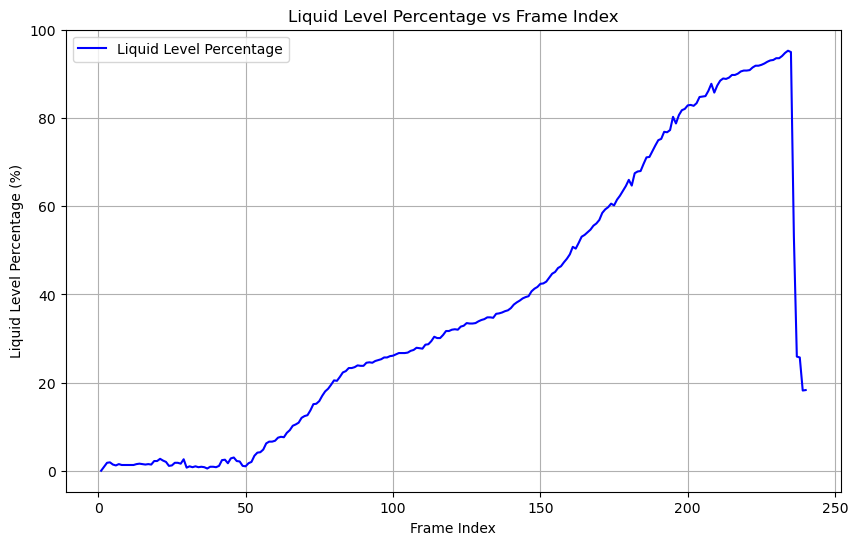

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths to video and background image
video_path = 'demo2_images/liquidVideo.mp4'
background_image_path = 'demo2_images/liquid_frame000.jpg'

# Load the background image
img_b = cv2.imread(background_image_path, 0)
if img_b is None:
    raise FileNotFoundError(f"Background image not found: {background_image_path}")

# Open the video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Video not found or cannot be opened: {video_path}")

# Initialize arrays to store frame indices and percentages
frame_indices = []
liquid_percentages = []

# Process the video frames
frame_idx = 0
while frame_idx < 240:  # Process up to 240 frames
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    # Convert the current frame to grayscale
    img_r = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Subtract the background from the current frame
    img_sub = cv2.subtract(img_b, img_r)

    # Apply thresholding to the subtracted image
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by size in descending order
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

    # Find the total image area
    rows, cols = img_sub_thresh.shape
    total_area = rows * cols

    # Calculate the largest contour's percentage of the total area
    if contours:
        largest_contour_area = cv2.contourArea(contours[0])
        percentage = round((largest_contour_area / total_area) * 100, 1)
    else:
        largest_contour_area = 0
        percentage = 0.0

    # Store the frame index and liquid percentage
    frame_indices.append(frame_idx + 1)
    liquid_percentages.append(percentage)

    # Print all details
    print(f"Frame {frame_idx + 1}:")
    print(f"  Threshold Value: {ret}")
    for i, contour in enumerate(contours):
        print(f"  Contour {i} Area: {cv2.contourArea(contour)}")
    print(f"  Total Area: {total_area}")
    print(f"  Percentage of Largest Contour: {percentage}%\n")

    # Increment the frame index
    frame_idx += 1
    
    
    # Release the video capture object
cap.release()
print("Video processing completed.")


# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(frame_indices, liquid_percentages, color='blue', label='Liquid Level Percentage')
plt.xlabel("Frame Index")
plt.ylabel("Liquid Level Percentage (%)")
plt.title("Liquid Level Percentage vs Frame Index")
plt.legend()
plt.grid(True)
plt.show()


# 2. A brief note on what the student understood by reading the section on Otsu's thresholding method

Otsu's method is a technique in image processing that automatically computes the optimum threshold value for converting gray-level images into binary images. The method analyzes the histogram of pixel intensities to divide the image into two distinct regions: the background (darker pixels) and the foreground (lighter pixels). By minimizing the variance within these regions, Otsu's method ensures that the threshold value effectively separates them.

Otsu's method can be applied using the function cv2.threshold() along with the cv2.THRESH_OTSU flag. The algorithm automatically finds the optimal thresholding value based on the histogram of the image without the need to specify this value yourself. Preprocessing is usually required to deal with images containing either noise or uneven illumination; thresholding is also improved when preprocessing operations (like Gaussian blurring) are performed first. This function is particularly useful for images whose histograms are bimodal, with clearly separated background and object intensities. This method is widely used in applications like document analysis, object detection, and medical imaging for its accuracy and adaptability.

# 3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images

In Frame 240, the bright reflections and uneven lighting at the top of the container interfere with Otsu’s method, leading to an inaccurate segmentation of some non-liquid regions as liquid. This issue arises because Otsu’s algorithm is sensitive to variations in pixel intensity, especially in regions with high contrast or irregular lighting. In Frame 239, the presence of surface ripples and the textured bottom of the container further complicates the segmentation process, as these variations in intensity result in an overestimation of the liquid level. Such challenges highlight the limitations of Otsu’s method in images with uneven lighting and complex texture variations, requiring additional preprocessing steps or alternative methods for more accurate segmentation.

Therefore, the values I got as output differ than the expected outputs. 
Frame 240:
    Threshold Value = 97.0
    Maximum Contour Area = 4733.0
    Total Area = 25920
    Percentage of Largest Contour: 18.3%
Frame 239:
    Threshold Value = 97.0
    Maximum Contour Area = 4729.5
    Total Area = 25920
    Percentage of Largest Contour: 18.2%

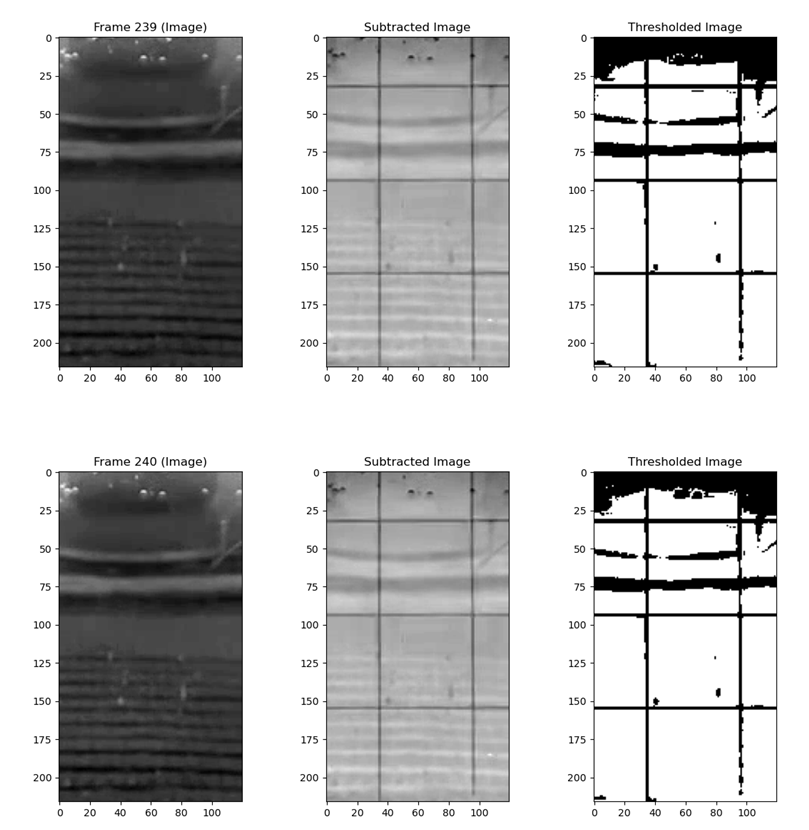

    


# 4. A brief description on the final algorithm developed by the student

The developed algorithm analyzes liquid levels in a video sequence by leveraging image processing techniques. It begins by loading a reference background image and sequentially reading frames from the video. Each frame is converted to grayscale to simplify processing. The algorithm performs background subtraction by comparing the current frame to the reference image, isolating changes in the scene, specifically the liquid regions. 

The resulting difference image is threshold using Otsu’s method, which dynamically determines an optimal threshold value to convert the image into a binary format. In the binary image, liquid regions are highlighted, and the algorithm detects contours to identify distinct regions. Among these contours, the largest one is assumed to represent the liquid level. The area of this contour is calculated and expressed as a percentage of the total frame area, representing the liquid’s relative coverage.

This process is repeated for each frame, storing the calculated percentages and corresponding frame indices. Finally, the algorithm plots a graph showing the liquid level percentage against the frame index, visualizing the changes over time. This method provides a robust approach for monitoring liquid level variations in dynamic environments, making it suitable for applications like industrial filling processes or scientific experiments.
